In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.datasets import AirPassengersDataset
%cd ..
%ls

/home/mahdigilany/offline_codes/codes/ts_snr
configs/     main.py     original_deeptime/  scripts/
darts_logs/  notebooks/  README.md           slurm_logs/
logs/        OLD/        requirements.txt    src/


In [2]:
from src.data.registry.data_registry import create_dataset, DataSeries
data_series: DataSeries = create_dataset('exchange_rate', split_ratio=(0.7,0.1,0.2), use_scaler=False) # TimeSeries class object

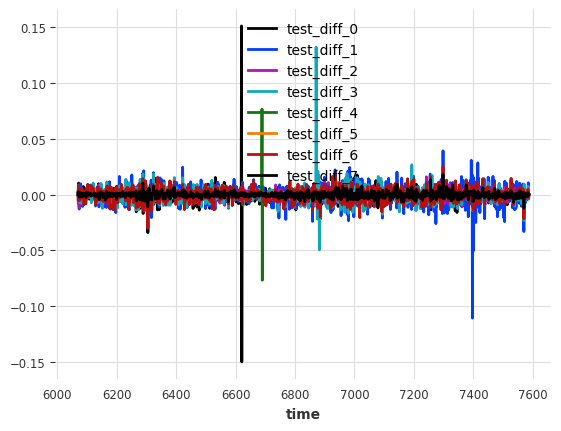

In [23]:
train, val, test = data_series.train_series, data_series.val_series, data_series.test_series
# test['0'][-100:].plot(label='test')
test_diff = test.diff()
test_diff.plot(label='test_diff')

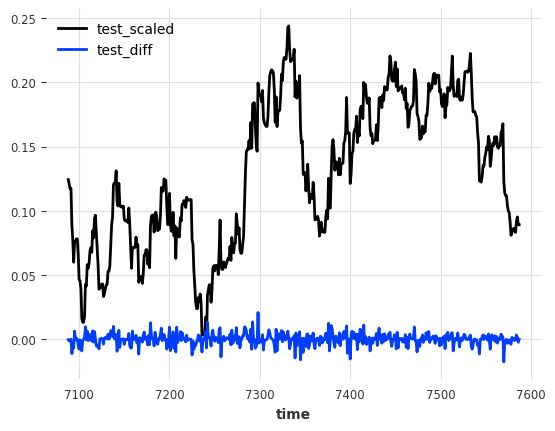

In [24]:
# import darts scaler
from darts.dataprocessing.transformers import Scaler
from sklearn import preprocessing

scaler = Scaler()
test_scaled = scaler.fit_transform(test)
test_scaled['0'][-500:].plot(label='test_scaled')
test_diff['0'][-500:].plot(label='test_diff')

1517 1518 1519
7587 7587 7587


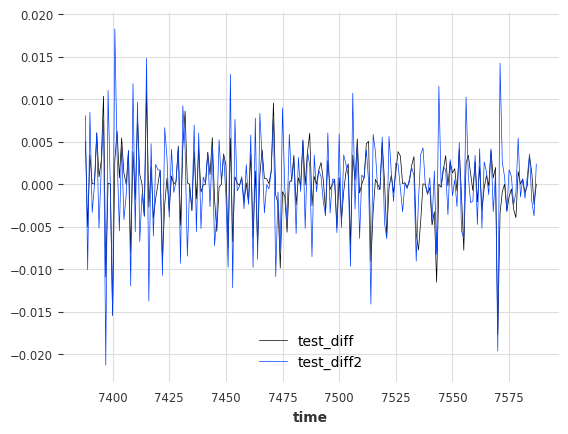

In [36]:
test_diff_diff = test_diff.diff()
print(len(test_diff_diff), len(test_diff), len(test))
print(test_diff_diff.time_index[-1], test_diff.time_index[-1], test.time_index[-1])
test_diff['0'][-200:].plot(label='test_diff', lw=0.5)
test_diff_diff['0'][-200:].plot(label='test_diff2', lw=0.5)


In [ ]:
train, val, test = data_series.train_series, data_series.val_series, data_series.test_series
print(train._xa.shape, val._xa.shape, test._xa.shape)
print(train._xa.mean().values.reshape(-1), val._xa.mean().values.reshape(-1), test._xa.mean().values.reshape(-1))
print(train._xa.std().values.reshape(-1), val._xa.std().values.reshape(-1), test._xa.std().values.reshape(-1))
# print(train._xa.mean(axis=0).values.reshape(-1), val._xa.mean(axis=0).values.reshape(-1), test._xa.mean(axis=0).values.reshape(-1))
# print(train._xa.std(axis=0).values.reshape(-1), val._xa.std(axis=0).values.reshape(-1), test._xa.std(axis=0).values.reshape(-1))

In [ ]:
train[-1000:].plot()
# val[-1000:].plot()
# test[-1000:].plot()
for i, component in enumerate(test.components):
    if i>10: 
        break
    plt.figure()
    train[component][-1000:].plot(label=component)
    # val[component][-1000:].plot(label=component)
    # test[component][-1000:].plot(label=component)

In [ ]:
train_ts: TimeSeries = data_series.train_series
val_ts = data_series.val_series
test_ts = data_series.test_series
train_ts[-1000:].plot(label='train')    
# train_ts._xa.sel({'component':['HUFL']})
train_ts._xa.values.shape
# train_ts.plot(label='train')
# val_ts.plot(label='val')

In [100]:
import pandas as pd

crypto_df = pd.read_csv('~/.darts/datasets/crypto.csv')
asset_details_df = pd.read_csv('~/.darts/datasets/crypto_asset.csv')

In [ ]:
crypto_df , asset_details_df

In [155]:
crypto_df['Asset_ID'].unique()

array([ 2,  0,  1,  5,  7,  6,  9, 11, 13, 12,  3,  8, 10,  4])

In [182]:
asset_details_df

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [204]:
list_names = ("Bitcoin", "Ethereum")
assets_df = asset_details_df.query(f'Asset_Name in {list_names}')
[row['Asset_ID'] for index, row in assets_df.iterrows()]

[1, 6]

In [198]:
assets_df

,Asset_ID,Weight,Asset_Name
2,1,6.779922,Bitcoin
5,6,5.894403,Ethereum


In [218]:
selected_crypto_df = crypto_df[crypto_df["Asset_ID"] == 6].set_index("timestamp")
selected_crypto_df["Target"] = selected_crypto_df["Target"].shift(15)
selected_crypto_df = selected_crypto_df.fillna(0)

In [219]:
selected_crypto_df

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,6,173.0,738.302500,746.00,732.51,738.507500,335.987856,738.839291,0.000000
1514764920,6,192.0,738.507500,745.14,732.49,738.260000,232.793141,738.268967,0.000000
1514764980,6,120.0,738.332500,745.12,730.00,737.502500,174.138031,737.994457,0.000000
1514765040,6,156.0,737.222500,744.69,728.93,737.102500,165.383926,737.303631,0.000000
1514765100,6,118.0,736.530000,743.80,727.11,735.705000,193.078039,736.163026,0.000000
...,...,...,...,...,...,...,...,...,...
1632182160,6,2162.0,2973.728686,2976.10,2962.09,2964.711429,751.256906,2968.339295,-0.000736
1632182220,6,1976.0,2965.461446,2967.95,2958.05,2960.845714,729.113672,2963.499199,-0.000491
1632182280,6,2262.0,2960.321429,2962.60,2954.14,2957.398571,807.935362,2958.464868,-0.000562


In [141]:
(selected_crypto_df.index[1:]-selected_crypto_df.index[:-1]).value_counts().head()

60    1956959
Name: timestamp, dtype: int64

In [207]:
selected_crypto_df = selected_crypto_df.reindex(range(selected_crypto_df.index[0],selected_crypto_df.index[-1]+60,60),method='pad')

In [208]:
selected_crypto_df.isna().sum()

Asset_ID    0
Count       0
Open        0
High        0
Low         0
Close       0
Volume      0
VWAP        0
Target      0
dtype: int64

In [209]:
selected_crypto_df = selected_crypto_df.drop(columns=["Asset_ID"])
selected_crypto_df = selected_crypto_df.set_index(selected_crypto_df.index.values.astype('datetime64[s]'))


In [220]:
selected_crypto_df = selected_crypto_df.rename(columns=lambda x: x+"_BTC")


In [221]:
selected_crypto_df

,Asset_ID_BTC,Count_BTC,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,VWAP_BTC,Target_BTC
timestamp,,,,,,,,,
1514764860,6,173.0,738.302500,746.00,732.51,738.507500,335.987856,738.839291,0.000000
1514764920,6,192.0,738.507500,745.14,732.49,738.260000,232.793141,738.268967,0.000000
1514764980,6,120.0,738.332500,745.12,730.00,737.502500,174.138031,737.994457,0.000000
1514765040,6,156.0,737.222500,744.69,728.93,737.102500,165.383926,737.303631,0.000000
1514765100,6,118.0,736.530000,743.80,727.11,735.705000,193.078039,736.163026,0.000000
...,...,...,...,...,...,...,...,...,...
1632182160,6,2162.0,2973.728686,2976.10,2962.09,2964.711429,751.256906,2968.339295,-0.000736
1632182220,6,1976.0,2965.461446,2967.95,2958.05,2960.845714,729.113672,2963.499199,-0.000491
1632182280,6,2262.0,2960.321429,2962.60,2954.14,2957.398571,807.935362,2958.464868,-0.000562


In [210]:
ts_crypto = TimeSeries.from_dataframe(selected_crypto_df, )

In [213]:
ts_crypto.components

Index(['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP', 'Target'], dtype='object', name='component')

In [148]:
ts_crypto.time_index, ts_crypto.components, ts_crypto.freq

(DatetimeIndex(['2018-01-01 00:01:00', '2018-01-01 00:02:00',
                '2018-01-01 00:03:00', '2018-01-01 00:04:00',
                '2018-01-01 00:05:00', '2018-01-01 00:06:00',
                '2018-01-01 00:07:00', '2018-01-01 00:08:00',
                '2018-01-01 00:09:00', '2018-01-01 00:10:00',
                ...
                '2021-09-20 23:51:00', '2021-09-20 23:52:00',
                '2021-09-20 23:53:00', '2021-09-20 23:54:00',
                '2021-09-20 23:55:00', '2021-09-20 23:56:00',
                '2021-09-20 23:57:00', '2021-09-20 23:58:00',
                '2021-09-20 23:59:00', '2021-09-21 00:00:00'],
               dtype='datetime64[ns]', name='time', length=1956960, freq='T'),
 Index(['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP', 'Target'], dtype='object', name='component'),
 <Minute>)

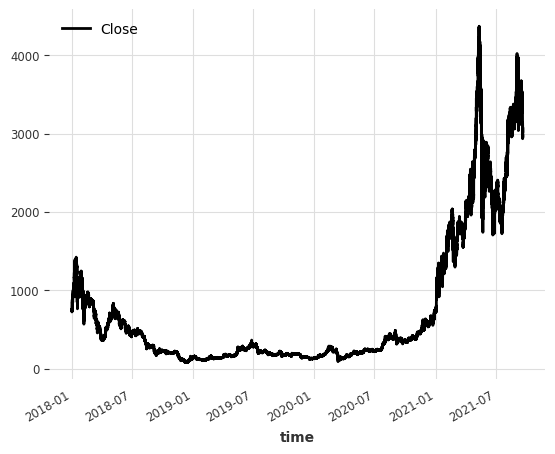

In [150]:
ts_crypto['Close'].plot()

In [2]:
import pandas as pd
asset_details_df = pd.read_csv('~/.darts/datasets/crypto_asset.csv')
crypto_df = pd.read_csv('~/.darts/datasets/crypto.csv')

In [62]:
crypto_df

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


In [ ]:
asset_details_df = asset_details_df.drop(index=13)

In [7]:
assets_df = asset_details_df

    
assets_series = {}
for index, row in assets_df.iterrows():
    asset_id = row["Asset_ID"]
    asset_name = row["Asset_Name"]
    
    # set timestamps as index
    selected_crypto_df = crypto_df[crypto_df["Asset_ID"] == asset_id].set_index("timestamp")
    
    # The target is 15-min residulized future returns
    # We need to shift this feature up by 15 rows
    # so that each data entry doesn't contain future information.
    selected_crypto_df["Target"] = selected_crypto_df["Target"].shift(15)
    
    # fill nan with 0
    selected_crypto_df = selected_crypto_df.fillna(0)
    
    # unknown why
    selected_crypto_df = selected_crypto_df[20:-1]
    
    # zero out inf values
    selected_crypto_df[selected_crypto_df == float('inf')] = 0
    selected_crypto_df[selected_crypto_df == float('-inf')] = 0
    
    # reindex to fill missing timestamps
    selected_crypto_df = selected_crypto_df.reindex(range(selected_crypto_df.index[0],selected_crypto_df.index[-1]+60,60),method='pad')
    
    # drop unused columns
    selected_crypto_df = selected_crypto_df.drop(columns=["Asset_ID"])
    selected_crypto_df = selected_crypto_df.rename(columns=lambda name: name + f"_{asset_name}")
    
    # change index timestamps to datetime for better visualization
    selected_crypto_df = selected_crypto_df.set_index(selected_crypto_df.index.values.astype('datetime64[s]'))
    
    # create darts timeseries
    crypto_series = TimeSeries.from_dataframe(selected_crypto_df)
    
    assets_series[asset_name] = crypto_series


In [60]:
target_indices = np.array(['Target' in component for component in crypto_series.components])
target_indices[2]=True
crypto_series[list(crypto_series.components[target_indices])]



<TimeSeries (DataArray) (time: 1768939, component: 2, sample: 1)>
array([[[1.02200000e+03],
        [0.00000000e+00]],

       [[1.02200000e+03],
        [0.00000000e+00]],

       [[1.02200000e+03],
        [0.00000000e+00]],

       ...,

       [[2.42600000e+03],
        [5.83757209e-06]],

       [[2.42300000e+03],
        [8.94033160e-03]],

       [[2.43900000e+03],
        [9.83083286e-03]]])
Coordinates:
  * time       (time) datetime64[ns] 2018-05-11T13:41:00 ... 2021-09-20T23:59:00
  * component  (component) object 'High_Maker' 'Target_Maker'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [8]:
minumum_len_index = np.array([len(asset_series) for asset_series in assets_series.values()]).argmin()
smallest_series = assets_series[list(assets_series.keys())[minumum_len_index]]
start_time, end_time = smallest_series.time_index[0], smallest_series.time_index[-1]
assets_series = {name: series.slice(start_ts=start_time, end_ts=end_time) for name, series in assets_series.items()}
# for asset_name, asset_series in assets_series.items():
#     print(asset_name, len(asset_series), asset_series.time_index[0], asset_series.time_index[-1])
# # assets_series['Bitcoin']['Close_Bitcoin'].plot()
# # assets_series['Ethereum']['Close_Ethereum'].plot()
# # assets_series['Dogecoin']['Close_Dogecoin'].plot()
# assets_series['Stellar']['Close_Stellar'].plot()

In [260]:
from darts import concatenate


series = concatenate(series=list(assets_series.values()), axis='component')


In [262]:
series.components

Index(['Count_Bitcoin Cash', 'Open_Bitcoin Cash', 'High_Bitcoin Cash',
       'Low_Bitcoin Cash', 'Close_Bitcoin Cash', 'Volume_Bitcoin Cash',
       'VWAP_Bitcoin Cash', 'Target_Bitcoin Cash', 'Count_Binance Coin',
       'Open_Binance Coin',
       ...
       'VWAP_Maker', 'Target_Maker', 'Count_Dogecoin', 'Open_Dogecoin',
       'High_Dogecoin', 'Low_Dogecoin', 'Close_Dogecoin', 'Volume_Dogecoin',
       'VWAP_Dogecoin', 'Target_Dogecoin'],
      dtype='object', name='component', length=112)

In [7]:
a = np.random.rand(10, 3)

np.sqrt(a)

array([[0.86597841, 0.71161125, 0.71410486],
       [0.23777378, 0.17668378, 0.98138039],
       [0.7247314 , 0.78237503, 0.76456062],
       [0.37033706, 0.77510662, 0.7761141 ],
       [0.17805065, 0.64712957, 0.9374625 ],
       [0.62955631, 0.98965834, 0.26988538],
       [0.66153575, 0.678999  , 0.74226989],
       [0.65850759, 0.79010961, 0.7287601 ],
       [0.75743975, 0.98006614, 0.58799468],
       [0.14039582, 0.27293294, 0.54423362]])